In [1]:
import ctypes
import multiprocessing
import os
import time
import matplotlib.pyplot as plt

In [2]:
def recur_fibo(n):
   if n <= 1:
       return n
   else:
       return(recur_fibo(n - 1) + recur_fibo(n - 2))

In [3]:
_libInC = ctypes.CDLL('./libMyLib.so')
_libInC.myInitCounters(1, 1)

x_vals = range(1, 31)
xe1_vals = [x-0.2 for x in x_vals]
xe2_vals = [x+0.2 for x in x_vals]
y1_vals = []
y1e1_vals = []
y1e2_vals = []
y2_vals = []
y2e1_vals = []
y2e2_vals = []
for n in range(1, 31):
    cyclecounts = []
    average_cyclecount = 0
    sd_cyclecount = 0
    times = []
    average_time = 0.0
    sd_time = 0.0
    for i in range(0,3):
        p = multiprocessing.Process(target=recur_fibo, args=[n])
        # before
        before_cyclecount = _libInC.myGetCyclecount()
        before_time = time.time()
        # execute recur_fibo()
        p.start()
        os.system("taskset -p -c {} {}".format(1, p.pid))
        #after
        after_cyclecount = _libInC.myGetCyclecount()
        after_time = time.time()
        # post processing
        cyclecounts.append(after_cyclecount - before_cyclecount)
        average_cyclecount += (after_cyclecount - before_cyclecount)
        times.append(after_time - before_time)
        average_time += (after_time - before_time)
        p.join()
    average_cyclecount //= 3
    y1_vals.append(average_cyclecount)
    sd_cyclecount = ((((cyclecounts[0] - average_cyclecount) ** 2 + (cyclecounts[1] - average_cyclecount) ** 2 + (cyclecounts[2] - average_cyclecount) ** 2) // 3) ** 0.5)
    y1e1_vals.append(average_cyclecount - sd_cyclecount)
    y1e2_vals.append(average_cyclecount + sd_cyclecount)
    average_time /= 3.0
    y2_vals.append(average_time)
    sd_time = ((((times[0] - average_time) ** 2 + (times[1] - average_time) ** 2 + (times[2] - average_time) ** 2) / 3.0) ** 0.5)
    y2e1_vals.append(average_time - sd_time)
    y2e2_vals.append(average_time + sd_time)

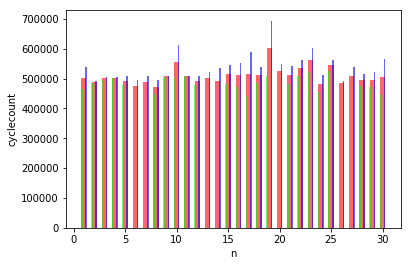

In [4]:
plt.bar(x_vals, y1_vals, width=0.5, color=(1.0,0.0,0.0,0.6))
plt.bar(xe1_vals, y1e1_vals, width=0.15, color=(0.0,1.0,0.0,0.6))
plt.bar(xe2_vals, y1e2_vals, width=0.15, color=(0.0,0.0,1.0,0.6))
plt.xlabel('n')
plt.ylabel('cyclecount')
plt.show()

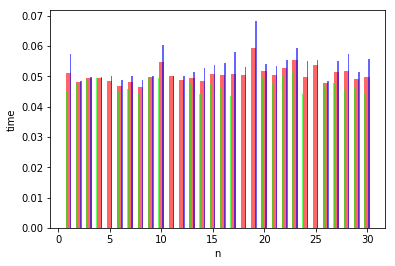

In [5]:
plt.bar(x_vals, y2_vals, width=0.5, color=(1.0,0.0,0.0,0.6))
plt.bar(xe1_vals, y2e1_vals, width=0.15, color=(0.0,1.0,0.0,0.6))
plt.bar(xe2_vals, y2e2_vals, width=0.15, color=(0.0,0.0,1.0,0.6))
plt.xlabel('n')
plt.ylabel('time')
plt.show()